In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import pathlib

In [2]:
project_path = pathlib.Path().parent.resolve().parent
data_path = project_path / pathlib.Path("data")

In [41]:
# Parameters

file_name = "resultado_teste_dim100_rep50.csv"
proportion = True

In [42]:
data = pd.read_csv(data_path / pathlib.Path(file_name), sep=";")
#data = pd.read_csv(path, sep=";")

In [43]:
data

,burned,dim,empty,finalTime,forest,simulations
0,2500,50,0.00,100,0,1_execution_dim_50_empty_0.0_
1,2500,50,0.00,100,0,2_execution_dim_50_empty_0.0_
2,2500,50,0.00,100,0,3_execution_dim_50_empty_0.0_
3,2500,50,0.00,100,0,4_execution_dim_50_empty_0.0_
4,2500,50,0.00,100,0,5_execution_dim_50_empty_0.0_
...,...,...,...,...,...,...
2495,1,50,0.98,100,68,46_execution_dim_50_empty_0.98_
2496,1,50,0.98,100,62,47_execution_dim_50_empty_0.98_
2497,1,50,0.98,100,52,48_execution_dim_50_empty_0.98_
2498,1,50,0.98,100,47,49_execution_dim_50_empty_0.98_


In [32]:
n_cells = data.dim.values[0] ** 2

if proportion:
    data.burned = data.burned / n_cells
    data.forest = data.forest / n_cells

In [33]:
cols_to_drop = ["dim", "finalTime", "simulations"]

data_agg = data.drop(columns=cols_to_drop).groupby("empty").agg(["count", "mean", "std"])

cols = []
for item, stat in data_agg.columns:
    cols.append(item + "_" + stat)
    
data_agg.columns = cols
data_agg = data_agg.drop(columns=["forest_count"]).reset_index().rename(columns={"burned_count": "n"})

data_agg["burned_mean_std"] = data_agg.burned_mean / np.sqrt(data_agg.n)
data_agg["forest_mean_std"] = data_agg.forest_mean / np.sqrt(data_agg.n)

In [34]:
initial_forest = 1 - data_agg["empty"]
y_label = "Proportion"

if not proportion:
    initial_forest * n_cells
    y_label = "Number of Cells"

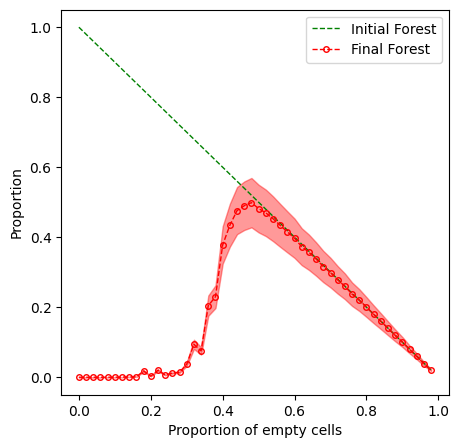

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

ax.plot(data_agg["empty"],
        initial_forest,
        "--",
        color="green",
        markerfacecolor="none",
        linewidth=1,
        label="Initial Forest")

ax.plot(data_agg["empty"],
        data_agg.forest_mean,
        "--o",
        color="red",
        markerfacecolor="none",
        markersize=4,
        linewidth=1,
        label="Final Forest")


ax.fill_between(data_agg["empty"],
                y1=data_agg.forest_mean + data_agg.forest_mean_std,
                y2=data_agg.forest_mean - data_agg.forest_mean_std, 
                color="red",
                alpha=0.4)


ax.set_xlabel("Proportion of empty cells")
ax.set_ylabel(y_label)

ax.legend()


plt.show()

In [36]:
from scipy.stats import bootstrap, norm

In [37]:
rng = np.random.default_rng()

In [38]:
low = []
high = []

for p in data["empty"].unique():
    res = bootstrap((data.loc[data["empty"]==p, "forest"].values,),
                    np.mean, confidence_level=0.95, random_state=rng)
    
    low.append(res.confidence_interval[0])
    high.append(res.confidence_interval[1])

C:\Users\PC-INPE\miniconda3\envs\fire_in_forest\Lib\site-packages\scipy\stats\_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
C:\Users\PC-INPE\miniconda3\envs\fire_in_forest\Lib\site-packages\scipy\stats\_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


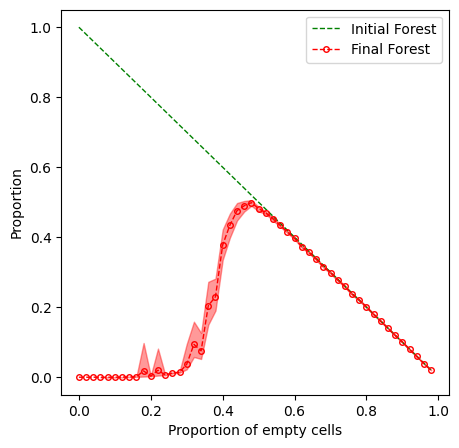

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

ax.plot(data_agg["empty"],
        initial_forest,
        "--",
        color="green",
        markerfacecolor="none",
        linewidth=1,
        label="Initial Forest")

ax.plot(data_agg["empty"],
        data_agg.forest_mean,
        "--o",
        color="red",
        markerfacecolor="none",
        markersize=4,
        linewidth=1,
        label="Final Forest")


ax.fill_between(data_agg["empty"][3:],
                y1=high[3:],
                y2=low[3:], 
                color="red",
                alpha=0.4)


ax.set_xlabel("Proportion of empty cells")
ax.set_ylabel(y_label)

ax.legend()


plt.show()